In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
import sys

# 获取当前文件所在的文件夹路径
if "__file__" in globals():
    # 获取__file__变量的值
    file_path = __file__
    # 获取当前文件所在的文件夹路径
    dir_now = os.path.dirname(file_path)
else:
    # 获取当前工作目录
    dir_now = os.getcwd()
sys.path.append(os.path.join(dir_now, '../../'))
sys.path.append(os.path.join(dir_now, '../'))
sys.path.append(os.path.join(dir_now, '../../../../../../csi_transformer/src'))

from NNutils import *
from amm_methods import *
import ctdirs_utils as cu

marker_list = ["s", "o", "v", "*", "1", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d", "3", "4", "8", "p", "h", "H", "<", ">", "d", "1", "v", "o", "s", "*", "+", "x", "D", "|", "^", "2", "P", "X", "d",]
colors_list = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2',
              '#8983BF', '#C76DA2', '#FFBE7A', '#82B0D2', '#BEB8DC',
              '#E7DAD2', '#999999']
cmap_list = ['Blues', 'Reds', 'Greens', 'Purples', 'Greys', 'Oranges']
cmap_max_list = [(0.05636293733179547, 0.34963475586312953, 0.6367550941945406, 1.0), 
                 (0.4725720876585929, 0.016608996539792385, 0.059838523644752006, 1.0), 
                 (0.034986543637062675, 0.45743944636678197, 0.19753940792003075, 1.0), 
                 (0.2703114186851211, 0.043183391003460206, 0.5101268742791234, 1.0), 
                    (0.4, 0.4, 0.4, 1.0),
                 (0.5412226066897348, 0.16955017301038064, 0.014579008073817762, 1.0)]


/shared/conda/envs/bolt/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def nmse(A, B):
    mse = ((A - B) ** 2).mean()
    max_value = max(np.amax(A), np.amax(B))
    min_value = min(np.amin(A), np.amin(B))
    return mse / ((max_value - min_value) ** 2)

In [3]:
dir_now

'/home/hdr/pq/bolt/experiments/python'

In [4]:
def read_A_enc_or_centroids(linear_name, n_train_sam, C, K, A_enc_or_centroids):
    if linear_name in ["etl1", "etl2", "dtl1", "dtl2"]:
        N = n_train_sam * 1024
        if linear_name in ["etl1"]:
            D = 64
        elif linear_name in ["etl2"]:
            D = 512
    else:
        N = n_train_sam * 32
        D = 2048
    if A_enc_or_centroids == "A_enc":
        A_enc_path = os.path.join(dir_now, 
            f'CsiTransformerAMM/intermediate_var/npy/{linear_name}/A_enc_({N}, {D})_{C}_{K}.npy')
        A_enc = np.load(A_enc_path)
        return A_enc
    elif A_enc_or_centroids == "centroids":
        centroids_path = os.path.join(dir_now, 
            f'CsiTransformerAMM/intermediate_var/npy/{linear_name}/centroids({C}, {K}, {D})_b_ridge_N{N}.npy')
        centroids = np.load(centroids_path)
        return centroids
    else:
        raise ValueError("A_enc_or_centroids must be 'A_enc' or 'centroids'")

In [5]:
etl1_exact = {"linear_name": "etl1", "AMM_method": "Exact", "n_train_sam":1000, "n_test_sam":1000,
     "fb":256, "cb":0, "ct":0}#, "test_idx":0, "skip_relu":False, 'AMM_train_on_the_spot':False,
         #"quantize_lut": True, "nbits":16, "upcast_every":16, "lut_work_const":-1}
# res_etl1_exact = cu.amm_res_read(etl1_exact)
# # 重置为二维矩阵
# res_etl1_exact = res_etl1_exact.reshape(-1, res_etl1_exact.shape[-1])
# print(res_etl1_exact.shape)

In [6]:
AMM_mad_C64K512_nb16_ucm1_lwcm32 = {"linear_name": "etl1", "AMM_method": "Mithral", "n_train_sam":1000, "n_test_sam":1000,
        "fb":256, "cb":64, "ct":512, "quantize_lut": True, "nbits":16, "upcast_every":-1, "lut_work_const":-32}
# res_AMM_mad_C64K512_nb16_ucm1_lwcm32 = cu.amm_res_read(AMM_mad_C64K512_nb16_ucm1_lwcm32)

In [7]:
AMM_train_dirs = get_AMM_train_dirs(AMM_mad_C64K512_nb16_ucm1_lwcm32["linear_name"], 
                    AMM_name_tran[AMM_mad_C64K512_nb16_ucm1_lwcm32["linear_name"]],
                    AMM_mad_C64K512_nb16_ucm1_lwcm32["AMM_method"], 
                    AMM_mad_C64K512_nb16_ucm1_lwcm32["fb"],
                    AMM_mad_C64K512_nb16_ucm1_lwcm32["n_train_sam"],
                    AMM_mad_C64K512_nb16_ucm1_lwcm32["n_test_sam"])
AMM_train_dirs

{'dir_joined': '/home/hdr/pq/bolt/experiments/python/../../../../transformer_data/joined',
 'dir_train': '/home/hdr/pq/bolt/experiments/python/../../../../transformer_data/joined/train/f256',
 'dir_test': '/home/hdr/pq/bolt/experiments/python/../../../../transformer_data/joined/test/f256',
 'dir_result': '/home/hdr/pq/bolt/experiments/python/../../../res/Mithral/f256/etl1',
 'linearin_path_train': 'ex_linear1in_train_f256_sam1000.npy',
 'y_train': 'ex_linear1_y_train_f256_sam1000.npy',
 'linearout_path_train': 'ex_linear1out_train_f256_sam1000.npy',
 'linearin_path_test': 'ex_linear1in_test_f256_sam1000.npy',
 'linearout_path_test': 'ex_linear1out_test_f256_sam1000.npy',
 'weightpath': 'ex_linear1_w_f256.npy',
 'biaspath': 'ex_linear1_b_f256.npy'}

In [13]:
A = np.load(os.path.join(AMM_train_dirs['dir_train'], AMM_train_dirs['linearin_path_train']))
print(A.shape)
print(A[:,0])
print(min(A[:,3]), max(A[:,3]))

(1024000, 64)
[ 0.0398715   0.01064676 -0.04364703 ...  0.01362665  0.22476621
  0.04012857]
-0.4189956 0.7267778


In [9]:
def A_res_read_multiple(linear_name, AMM_method, n_train_sam, cb, ct_list, quantize_lut, nbits, upcast_every, lut_work_const):
    res_list = []
    for ct in ct_list:
        AMM_dict = {"linear_name": linear_name, "AMM_method": AMM_method, "n_train_sam":n_train_sam, "n_test_sam":1000,
                    "fb":256, "cb":cb, "ct":ct, "quantize_lut": quantize_lut, "nbits":nbits, "upcast_every":upcast_every, "lut_work_const":lut_work_const}
        A_enc = read_A_enc_or_centroids(AMM_dict["linear_name"],
                                        AMM_dict["n_train_sam"],
                                        AMM_dict["cb"],
                                        AMM_dict["ct"],
                                        "A_enc")
        centroids = read_A_enc_or_centroids(AMM_dict["linear_name"],
                                            AMM_dict["n_train_sam"],
                                            AMM_dict["cb"],
                                            AMM_dict["ct"],
                                            "centroids")
        # A_enc的第n列减去n*K
        A_enc = A_enc - np.arange(0, A_enc.shape[1]) * AMM_dict["ct"]
        # 依次将A_enc的第n列作为索引x，取centroids的(n, x, n)生成与A_enc同形状的矩阵
        res = np.array([centroids[i, A_enc[:,i], i] for i in range(A_enc.shape[1])]).T
        res_list.append(res)
    return res_list


In [10]:
ct_list = [128, 256, 512, 1024, 2048]
len_ct_list = len(ct_list)

In [11]:
A_res_etl1_mad_C64_list = A_res_read_multiple("etl1", "Mithral", 1000, 64, ct_list, True, 16, -1, -32)

In [12]:
A_res_etl1_mad_C64_list

[array([[ 0.04072852, -0.05273468, -0.02032031, ..., -0.3510338 ,
          0.14046347,  0.01366208],
        [ 0.01449977, -0.05273468, -0.04904482, ..., -0.36943513,
          0.05481406, -0.10239662],
        [-0.04015982, -0.04614193, -0.07833015, ...,  0.        ,
          0.11322848, -0.01834424],
        ...,
        [ 0.2831486 , -0.01110659,  0.03235359, ..., -0.10779138,
          0.14841467,  0.05959477],
        [-0.29512557, -0.20042066, -0.1939173 , ..., -0.23191883,
          0.04833349, -0.0650389 ],
        [-0.02019431,  0.04861422,  0.00342804, ..., -0.13958491,
         -0.01295373,  0.0233225 ]], dtype=float32),
 array([[ 0.0415758 , -0.05188308, -0.02082468, ..., -0.3510338 ,
          0.14016308,  0.01307476],
        [ 0.01351657, -0.05188308, -0.04960842, ..., -0.36943513,
          0.05427535, -0.10120812],
        [-0.0408914 , -0.04538745, -0.0775938 , ...,  0.        ,
          0.11322852, -0.01779445],
        ...,
        [ 0.28036904, -0.01033935,  0.0

In [14]:
# 求Exact矩阵中数据的最大值和最小值
exact_max = np.amax(A)
exact_min = np.amin(A)
print("原A矩阵中数据的最大值和最小值分别为：", exact_max, exact_min)
print("原A矩阵中数据的动态范围为：", exact_max - exact_min)

原A矩阵中数据的最大值和最小值分别为： 1.827353 -1.8480135
原A矩阵中数据的动态范围为： 3.6753664


In [16]:
for i, res in enumerate(A_res_etl1_mad_C64_list):
    print("ct = ", ct_list[i], ", 聚类前后A矩阵的NMSE = ", nmse(res, A))

ct =  128 , 聚类前后A矩阵的NMSE =  0.002182157632520899
ct =  256 , 聚类前后A矩阵的NMSE =  0.0022214571681112034
ct =  512 , 聚类前后A矩阵的NMSE =  0.002297766872326538
ct =  1024 , 聚类前后A矩阵的NMSE =  0.002353478065182029
ct =  2048 , 聚类前后A矩阵的NMSE =  0.002435889760381781


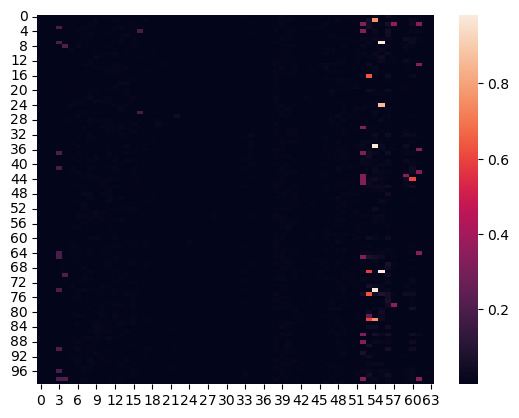

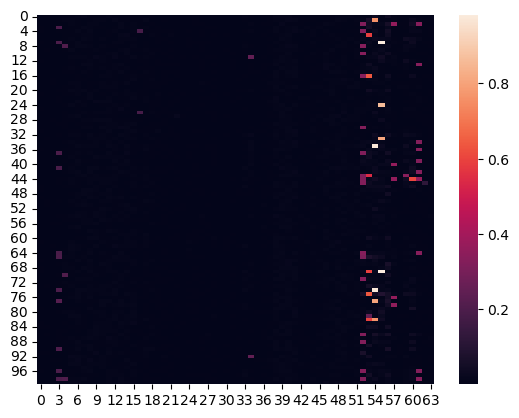

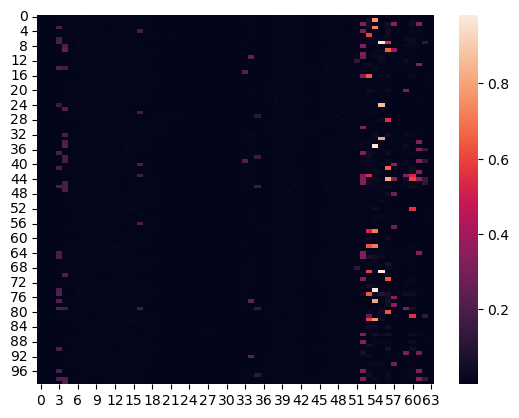

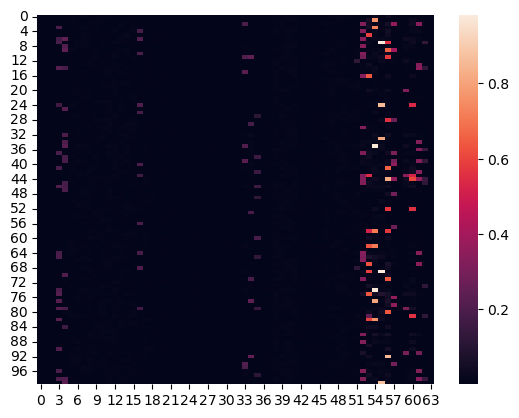

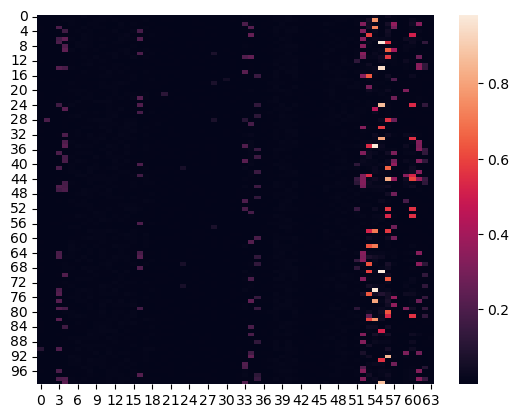

In [18]:
for i, res in enumerate(A_res_etl1_mad_C64_list):
    # 求res - res_etl1_exact的绝对值
    diff = np.abs(res - A)
    plt.figure()
    sns.heatmap(diff[:100,:])#, cmap=cmap_list[0], vmin=-0.1, vmax=0.1)

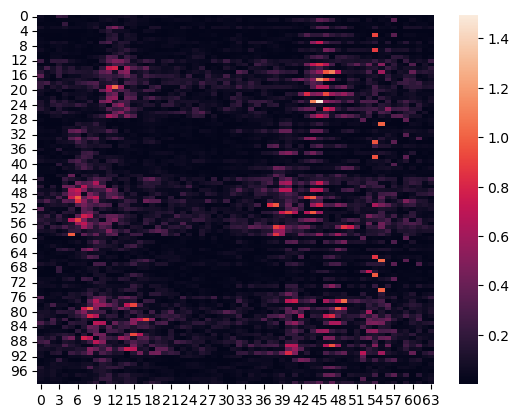

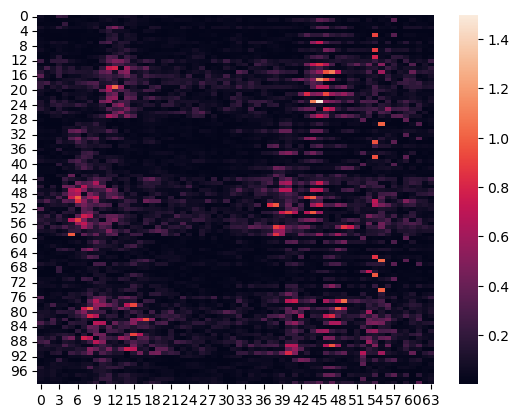

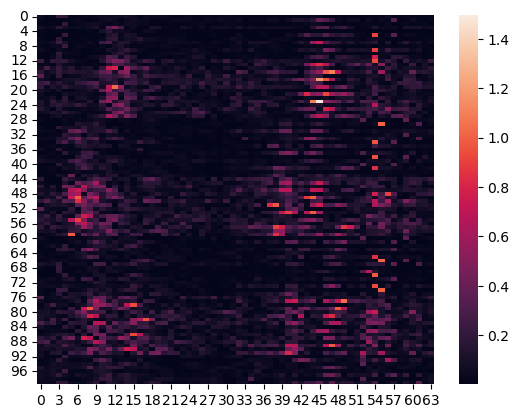

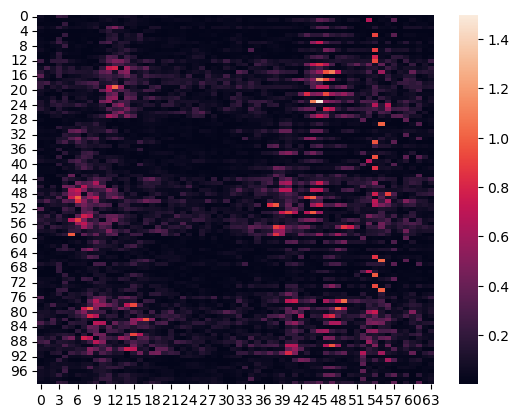

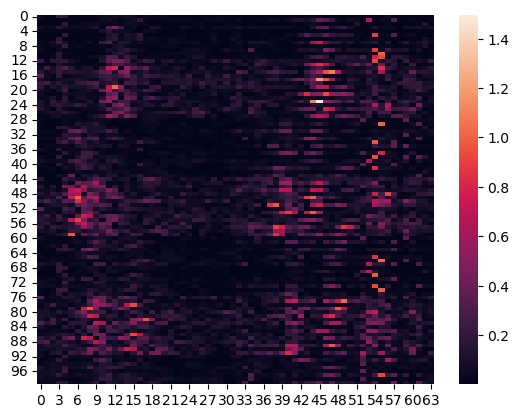

In [20]:
for i, res in enumerate(A_res_etl1_mad_C64_list):
    # 求res - res_etl1_exact的绝对值
    diff = np.abs(res - A)
    plt.figure()
    sns.heatmap(diff[100100:100200,:])#, cmap=cmap_list[0], vmin=-0.1, vmax=0.1)

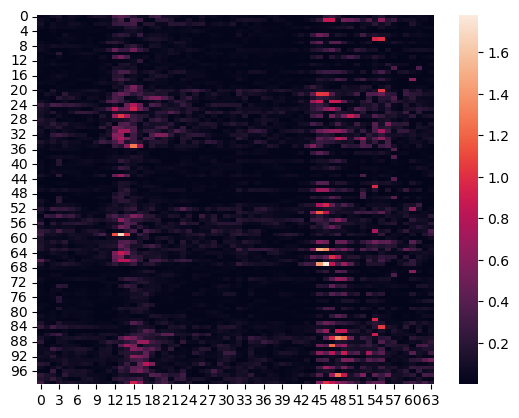

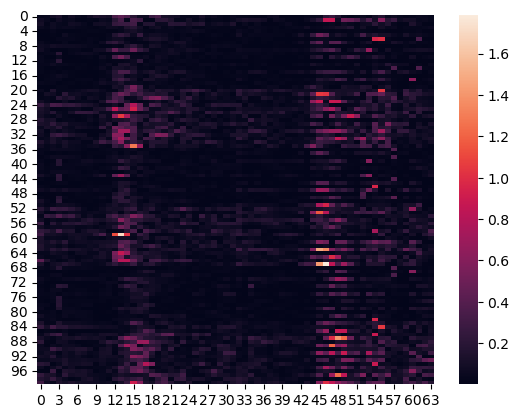

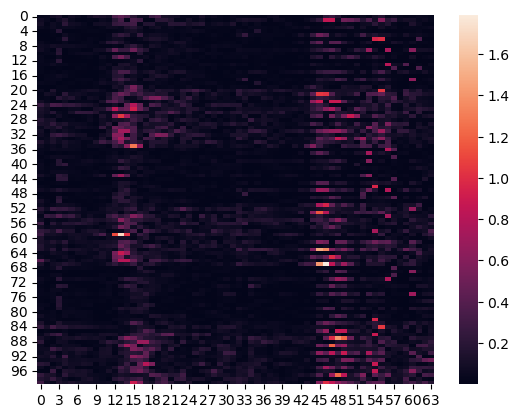

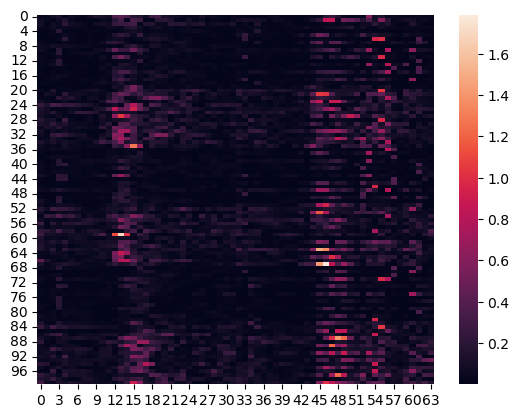

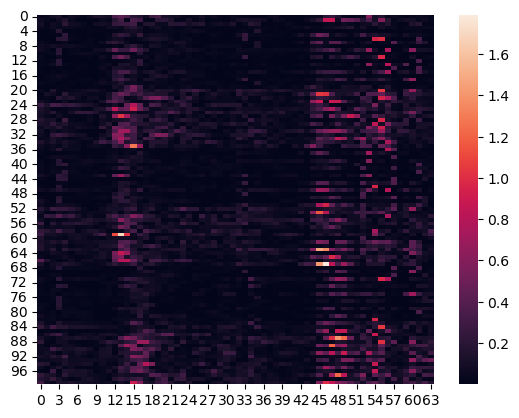

In [22]:
for i, res in enumerate(A_res_etl1_mad_C64_list):
    # 求res - res_etl1_exact的绝对值
    diff = np.abs(res - A)
    plt.figure()
    sns.heatmap(diff[9500:9600,:])#, cmap=cmap_list[0], vmin=-0.1, vmax=0.1)